My learnings :

```
# This is formatted as code
```


tf.Variable:Parameters that TensorFlow is allowed to change during training.
tf.GradientTape:The tool that tracks math operations to calculate derivatives automatically.
learning_rate:"Controls how big of a ""step"" the model takes during each update (0.09 here)."
assign_sub,Performs the update: Variable=Variable−(Step×Gradient).

In [2]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# This script requires TensorFlow 2 and Python 3. # validation of the version
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

dL/dw = 2/N sum (wx + b - y). x

In [4]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0
# SOFTWARE LOOK AT TGHE ALL THE POINTS look at the above dL/dw
# Define our loss function
def loss(predicted_y, target_y): # MSE mean squared error! --> how far this is from the actual data : the goal of training to drive this number to zero!
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate): # calculas happs
  with tf.GradientTape() as t: # calculate gradiant (derivates)
    current_loss = loss(model(inputs), outputs) # --> find the current loss
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b]) # --> calculate th gradient
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw) # ---> optimize it!
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model  --> y = wx + b
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [5]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50) # iterations
losses = []
for epoch in epochs: # the brain
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-0.41 b=5.86, loss=27.47032
Epoch  2: w=-0.02 b=5.28, loss=22.43888
Epoch  3: w=0.16 b=4.69, loss=18.46284
Epoch  4: w=0.33 b=4.16, loss=15.19137
Epoch  5: w=0.49 b=3.68, loss=12.49958
Epoch  6: w=0.63 b=3.25, loss=10.28476
Epoch  7: w=0.76 b=2.85, loss=8.46238
Epoch  8: w=0.87 b=2.50, loss=6.96291
Epoch  9: w=0.98 b=2.17, loss=5.72914
Epoch 10: w=1.07 b=1.88, loss=4.71398
Epoch 11: w=1.16 b=1.61, loss=3.87870
Epoch 12: w=1.24 b=1.37, loss=3.19143
Epoch 13: w=1.31 b=1.15, loss=2.62593
Epoch 14: w=1.37 b=0.95, loss=2.16064
Epoch 15: w=1.43 b=0.77, loss=1.77779
Epoch 16: w=1.48 b=0.60, loss=1.46278
Epoch 17: w=1.53 b=0.45, loss=1.20359
Epoch 18: w=1.57 b=0.32, loss=0.99032
Epoch 19: w=1.61 b=0.20, loss=0.81484
Epoch 20: w=1.65 b=0.08, loss=0.67046
Epoch 21: w=1.68 b=-0.02, loss=0.55166
Epoch 22: w=1.71 b=-0.11, loss=0.45391
Epoch 23: w=1.74 b=-0.19, loss=0.37348
Epoch 24: w=1.76 b=-0.27, loss=0.30730
Epoch 25: w=1.79 b=-0.33, loss=0.2

### Plot our trained values over time

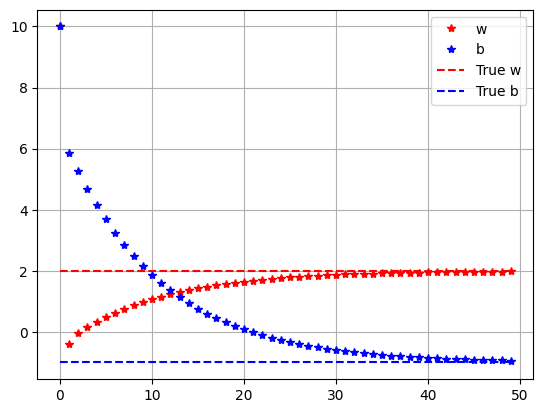

In [9]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, '*r', epochs, list_b, '*b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.grid()
plt.show()